## Project Description
say what we are doing and why...

## Table of Contents
1. [Team](#team)
2. [Requirements](#requirements)
3. [Setup](#setup)
4. [Logistic Regression](#logistic-regression)
    1. [Logistic Regression Model 1](#logistic-regression-model-1)
    2. [Logistic Regression Model 2](#logistic-regression-model-2)
5. [Support Vector Machines](#support-vector-machines)    
    1. [SVM Model 1](#svm-model-1)
    2. [SVM Model 2](#svm-model-2)
6. [Summary](#summary)

## Team
- Adam Alidra
- Ryan Herrin
- Josh Mitchell

## Requirements
- Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.
- Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.
- Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?
- Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

## Setup 
Import required libraries and read in our data. Next, we partition the data and use 80% for training and 20% for testing. 

In [46]:
# Libraries
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
plt.style.use('ggplot')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Define common random seed value and sample test percentage size 
seed_value = 8675309 # if you know you know

# Create function to standardize how we modify incoming new csv datasets 
def get_useful_features(dataframe, additional=None):
    pd_df = dataframe
    if not additional:
        unused_columns = ['vt_harmless', 'vt_undetected', 'vt_malicious', 'vt_suspicious',
				      'avclass_name', 'obf_name', 'sha1', 'fpath']
    else:
        unused_columns = additional
    # Remove Duplicates
    if 'sha1' in pd_df.keys():
        pd_df.drop_duplicates('sha1', inplace=True)
        # Check to see if duplicate header is present. Remove if there is 
        if pd_df.at[0, 'sha1'] == 'sha1':
            pd_df = pd_df.iloc[1:] 

	# Remove unused columns 
    pd_df = pd_df.drop(columns=unused_columns)
    
    # Keep only the rows that are labled 1 or 3 in the "is_obf" column
    pd_df['is_obf'] = pd.to_numeric(pd_df['is_obf'], downcast='integer')
    pd_df.drop(pd_df.loc[pd_df['is_obf']==2].index, inplace=True)

    return(pd_df)

# helper function to split our data into train and test sets
def _split_data(dataframe, label_name, seed):
    '''Split the data from the dataframe into 80/20 test and returns the training data, 
    testing data, training/test features, train/test lables'''
    df_train, df_test = train_test_split(dataframe, test_size=.2, random_state=seed)
    df_train_features = df_train[df_train.columns[df_train.columns != label_name]].to_numpy() 
    df_test_features = df_test[df_test.columns[df_test.columns != label_name]].to_numpy()
    df_train_labels = df_train[df_train.columns[df_train.columns == label_name]].to_numpy().ravel()
    df_test_labels = df_test[df_test.columns[df_test.columns == label_name]].to_numpy().ravel()  

    return(df_train, df_test, df_train_features, df_test_features, df_train_labels, df_test_labels)

# NOTE: Data imported has been generated from the first lab 
raw_with_extra_feature_location = '../dataset/all_with_keyword_sum.csv'

raw_e_df = pd.read_csv(raw_with_extra_feature_location)
raw_drop_df = get_useful_features(raw_e_df)


## Logistic Regression

TODO: discuss parameter adjustment to make model more accurate

TODO: discuss advantages of LR

TODO: discuss performance of LR

TODO: discuss importance of different features

TODO: use time to see how long model training takes

TODO: add visualization of each model (maybe show boundary)

### Logistic Regression Model 1
Logistic regression model for the raw data set. Discuss the model performance (confusion matrix) and training time here. add visualization code. 


In [12]:
# Function to generated logistic regression model
def  create_logistic_model(dataframe, label, seed=None):
    '''Function to create a linear regression model. When ran it will display the accuracy and confusion matrix of the model.
    @Params:
    - dataframe (pandasDataframe) : Dataframe Object
    - label (str) : name of the column that defines the label 
    - seed (optional) (int) : integer value for a seed
    @Returns: fitted LogisticRegression()
    '''
    # Create logistic regression model
    logreg_model = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear', max_iter=200) 
    # Data split
    df_train, df_test, df_train_features, df_test_features, df_train_labels, df_test_labels = _split_data(
        dataframe, label, seed
    )
    # Fit the model
    logreg_model.fit(df_train_features, df_train_labels)
    # Test out the model and create predictions 
    logreg_pred = logreg_model.predict(df_test_features)
    # get accuracy 
    logreg_accuracy = mt.accuracy_score(df_test_labels, logreg_pred)
    # Confusion Matrix 
    logreg_conf = mt.confusion_matrix(df_test_labels, logreg_pred)

    # Display results 
    print("Accuracy: ", logreg_accuracy)
    print("Confusion Matrix\n", logreg_conf)  

    return(logreg_model) 

def get_logreg_weights(dataframe, log_model, label_name, title=None, v=False):
    '''Prints the weights of each feature in the model and displays a graphic. Returns nothing. 
    @Params:
    - dataframe (PandasDataframe) : Dataframe used when creating the model
    - log_model (LogisticRegression) : Model returned from the create_logistic_model() function
    - label_name (string) : name of the lable column used to created the model
    - title (string) : Title of the bar graph
    - v (bool) : If true, prints the wieghts. If False, only prints chart
    '''
    # Create dataframe to send to bar grpah 
    logreg_tmp_df = dataframe[dataframe.columns[dataframe.columns != label_name]]
    logreg_wghts = pd.DataFrame(log_model.coef_[0], columns=['value'], index=logreg_tmp_df.columns)

    # display those that have a weight greater than .001
    logreg_wghts = logreg_wghts.loc[(logreg_wghts["value"] >= .001) | (logreg_wghts["value"] <= -.001)]

    # Plot / Display
    if title == None: 
        logreg_wghts.plot(kind='bar', title='Feature Weights')
    else:
        logreg_wghts.plot(kind='bar', title=title)
    plt.show()

    if v == True:
        # Display text Versions 
        # Get the weights for each variable 
        logreg_vars = zip(log_model.coef_.T, logreg_tmp_df)
        logreg_vars = sorted(logreg_vars)
        # Display Weights 
        print('\nFeature Weights\n---------------------')
        for coef, name in logreg_vars:
            print(name, 'weight: ', coef[0])

Raw Data Model and Results
Accuracy:  0.9615569437770303
Confusion Matrix
 [[ 613   27]
 [  53 1388]]


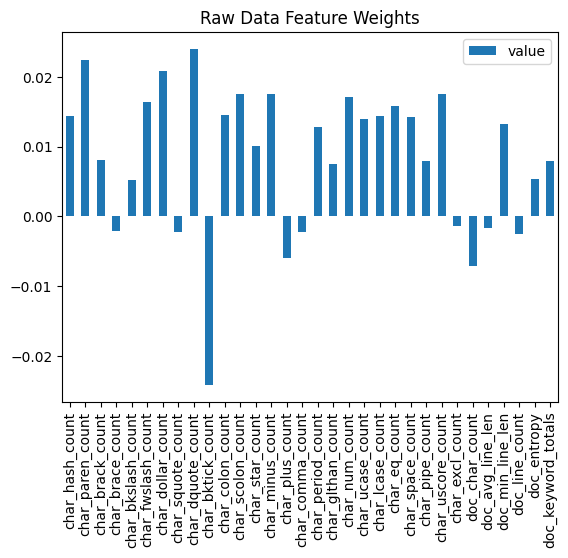

In [13]:
print('Raw Data Model and Results')
raw_data_logreg_model = create_logistic_model(raw_drop_df, 'is_obf', seed_value)
# Display Weights for Raw Data
get_logreg_weights(raw_drop_df, raw_data_logreg_model, 'is_obf', title='Raw Data Feature Weights', v=False)

### Logistic Regression Model 2
Logistic regression model for the transformed data set. Discuss the model performance (confusion matrix) and training time here. add visualization code. 


## Support Vector Machines

TODO: inspect support vectors

TODO: discuss advantages of SVM

TODO: discuss performance of SVM

TODO: discuss importance of different features

TODO: use time to see how long model training takes

TODO: add visualization of each model (maybe show boundary)

### SVM Model 1
SVM model for the raw data set. Discuss the model performance (confusion matrix) and training time here. add visualization code. 

In [17]:
# Code for visualiztion of SVM models 
'''
Referenced from:
https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
'''
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

def create_svm_model(dataframe, label, seed, svm_kernal='rbf', n_folds=5):
    '''Create SVM model. When ran it will display the accuracy and confusion matrix of the model. Returns SVM Model.
    @Params:
    - dataframe (pandasDataFrame) : Dataframe to run 
    - lable (string) : Name of column that's used as the lable
    - seed (optional) (int) : seed to keep random value the same 
    - svm_kernal : Refer to sklearn.svm for options. {linear, poly, rbf, sigmoid, precomputed}
    - n_folds (int) : number of k-folds that will be passed to the param selection pipeline. Default = 5
    @Returns: SVM Model
    '''
    # Data split
    df_train, df_test, df_train_features, df_test_features, df_train_labels, df_test_labels = _split_data(
        dataframe, label, seed
    )

    def svc_param_selection(X, y, n_folds):
        '''SVM Pipeline function to find the best parameters for SVM'''
        c = [0.001, 0.01, 0.1, 1, 10] # regularization is inversely proportional to C
        gammas = [0.001, 0.01, 0.1, 1] # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
        param_grid = {'C': c, 'gamma' : gammas}
        grid_search = GridSearchCV(svm.SVC(kernel=svm_kernal), param_grid, cv=n_folds)
        grid_search.fit(X, y)
        grid_search.best_params_

        return(grid_search.best_params_)

    # Get the best parameters for C and gamma using a pipeline
    best_params = svc_param_selection(df_train_features, df_train_labels, n_folds)
    svm_C = best_params['C']
    svm_gamma = best_params['gamma']

    print("Creating SVM using options ->  C: {}, kernel: {}, gamma: {}".format(
        svm_C, svm_kernal, svm_gamma)
        )

    # Model creation and testing
    svm_model = SVC(C=svm_C, kernel=svm_kernal, gamma=svm_gamma) # Create the SVM model object 
    svm_model.fit(df_train_features, df_train_labels) # Fit the model
    svm_y_hat = svm_model.predict(df_test_features) # Create predictions from the test data features
    # Get accuracy 
    svm_acc = mt.accuracy_score(df_test_labels, svm_y_hat)
    # Get confusion matrix 
    svm_conf = mt.confusion_matrix(df_test_labels, svm_y_hat)

    # Display results
    print("Accuracy: ", svm_acc)
    print("Confusion Matrix\n", svm_conf)

    return(svm_model)                    

In [18]:
# Transformed data SVM model 
tf_svm_model = create_svm_model(raw_drop_df, 'is_obf', seed_value, svm_kernal='rbf', n_folds=2)

Creating SVM using options ->  C: 10, kernel: rbf, gamma: 0.001
Accuracy:  0.7169629985583854
Confusion Matrix
 [[  51  589]
 [   0 1441]]


In [60]:

to_remove = ['doc_dtype_bool_word_count', 'doc_dtype_char_word_count',
       'doc_dtype_int_word_count', 'doc_dtype_long_word_count',
       'doc_dtype_float_word_count', 'doc_dtype_single_word_count',
       'doc_dtype_double_word_count', 'doc_dtype_decimal_word_count',
       'doc_keyword_begin_word_count', 'doc_keyword_break_word_count',
       'doc_keyword_catch_word_count', 'doc_keyword_class_word_count',
       'doc_keyword_continue_word_count', 'doc_keyword_data_word_count',
       'doc_keyword_define_word_count', 'doc_keyword_do_word_count',
       'doc_keyword_dynamicparam_word_count', 'doc_keyword_else_word_count',
       'doc_keyword_elseif_word_count', 'doc_keyword_end_word_count',
       'doc_keyword_enum_word_count', 'doc_keyword_exit_word_count',
       'doc_keyword_filter_word_count', 'doc_keyword_finally_word_count',
       'doc_keyword_foreach_word_count', 'doc_keyword_from_word_count',
       'doc_keyword_function_word_count', 'doc_keyword_hidden_word_count',
       'doc_keyword_if_word_count', 'doc_keyword_in_word_count',
       'doc_keyword_param_word_count', 'doc_keyword_process_word_count',
       'doc_keyword_return_word_count', 'doc_keyword_static_word_count',
       'doc_keyword_switch_word_count', 'doc_keyword_throw_word_count',
       'doc_keyword_trap_word_count', 'doc_keyword_try_word_count',
       'doc_keyword_until_word_count', 'doc_keyword_using_word_count',
       'doc_keyword_var_word_count', 'doc_keyword_while_word_count']
scaled_df = raw_drop_df.copy()
scaled_df = get_useful_features(scaled_df, to_remove)
explanatory_var = scaled_df['is_obf']
scaled_df.doc_keyword_totals = log(scaled_df.doc_keyword_totals)
scaler = StandardScaler()
scaler.fit(scaled_df.drop('is_obf', axis = 1))
scaled_values = scaler.transform(scaled_df.drop('is_obf', axis = 1))
data = pd.DataFrame(scaled_values, index = scaled_df.index, columns = scaled_df.drop('is_obf', axis = 1).columns)
data['is_obf'] = explanatory_var


In [66]:
scaled_svm_model = create_svm_model(data, 'is_obf', seed_value, svm_kernal='rbf', n_folds=5)

384192    1
384193    1
384194    1
384195    1
384196    1
         ..
408875    3
408876    3
408877    3
408878    3
408879    3
Name: is_obf, Length: 10405, dtype: int8

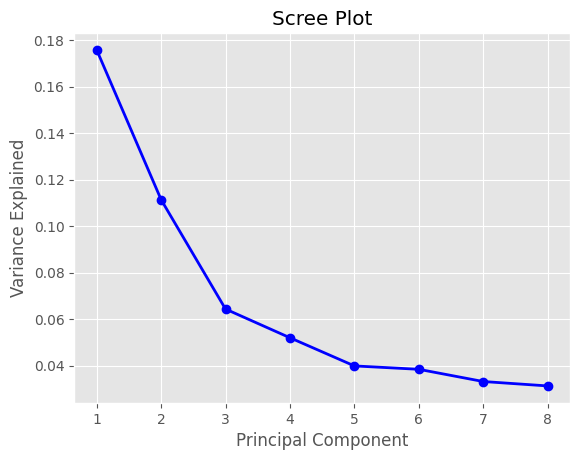

In [63]:
pca = PCA(n_components = 8)
pca_fit = pca.fit(data.drop('is_obf', axis = 1))
X_pca_8 = pca_fit.transform(data.drop('is_obf', axis = 1))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [81]:
df_pca_8 = pd.DataFrame(X_pca_8, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_pca_8['is_obf'] = raw_drop_df['is_obf'].values


In [82]:

pca_svm_model = create_svm_model(df_pca_8, 'is_obf', seed_value, svm_kernal='rbf', n_folds=5)

### SVM Model 2
SVM model for the transformed data set. Discuss the model performance (confusion matrix) and training time here. add visualization code. 

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Summary
which model was better? Why? how do the transformations change model performance? what model parameters worked out best for LR? for SVM (gammma, penalty parameter)? 

